In [36]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
fs = 14
matplotlib.rcParams['font.size']=fs
matplotlib.rcParams['lines.markersize']=8
from helper.poly_fit import poly_fit_timescales

In [2]:
from allsn_info import get_iPTF14gqr, get_sn2005ek, get_ptf10iuv, get_sn1010X, get_sn2019bkc, \
                        get_at2019dge, get_ogle13sn079, get_sn2018kzr, get_ias, \
                        get_ptf09dav, get_sn2016hnk, get_sn2002bj

### Read light curves of subluminous fast transients
AT2019dge (this work)

In [3]:
tb0 = get_at2019dge()['tb']
tb0 = tb0[tb0['filter'].values=='r']

In [4]:
x0 = tb0["tmax_rf"].values
y0 = tb0['mag0_abs'].values
ey0 = tb0['emag'].values

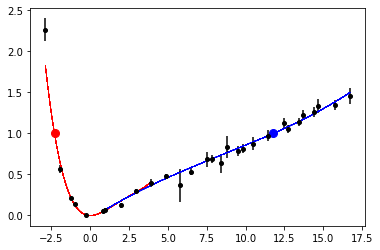

In [6]:
r0 = poly_fit_timescales(x0, y0, ey0, name = "AT2019dge")

iPTF14gqr (De et al. 2018)

In [7]:
tb1 = get_iPTF14gqr()
tb1 = tb1[tb1['filter'].values=='r   ']

x1 = tb1["tmax_rf"].values
y1 = tb1['mag0_abs'].values 
ey1 = tb1['e_mag'].values

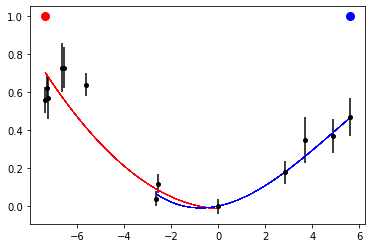

In [8]:
r1 = poly_fit_timescales(x1, y1, ey1, name = "iPTF14gqr")

SN2005ek (Drout et al. 2013)

In [9]:
tb2 = get_sn2005ek()
tb2 = tb2[tb2["filter"].values=="R"]

adopt r band t_max from Drout+13


In [10]:
x2 = tb2["tmax_rf"].values
y2 = tb2['mag0_abs'].values
ey2 = tb2['emag'].values

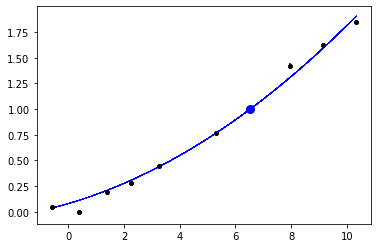

In [11]:
r2 = poly_fit_timescales(x2, y2, ey2, name = "SN2005ek")

SN2016hnk (Galbany et al. 2016). Add ATLAS $o$-band discovery epoch.

In [12]:
tb3 = get_sn2016hnk()
ix = np.any([tb3["filter"].values=='r', 
             np.all([tb3["filter"].values=='o', tb3["tmax_rf"].values==min(tb3["tmax_rf"].values)], axis=0)
                    ], axis=0)
tb3 = tb3[ix]
tb3 = tb3.sort_values(by=['tmax_rf'])

In [13]:
x3 = tb3["tmax_rf"].values
y3 = tb3['mag0_abs'].values
ey3 = tb3['emag'].values

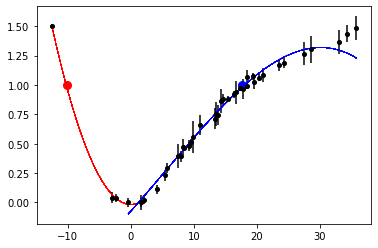

In [14]:
r3 = poly_fit_timescales(x3, y3, ey3, name = "SN2016hnk")

SN2010X (Kasliwal et al. 2010)

In [15]:
tb4 = get_sn1010X() # yes
tb4 = tb4[tb4["filter"].values=="r"]

x4 = tb4["tmax_rf"].values
y4 = tb4['mag0_abs'].values
ey4 = tb4['emag'].values

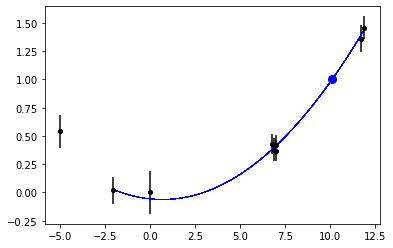

In [16]:
r4 = poly_fit_timescales(x4, y4, ey4, name = "SN2010X")

SN2019bkc (Chen et al. 2020). Add ZTF $g$-band discovery epoch.

In [17]:
tb5 = get_sn2019bkc()
ix = np.any([tb5["filter"].values=='r', 
             np.all([tb5["filter"].values=='g', tb5["tmax_rf"].values==min(tb5["tmax_rf"].values)], axis=0)
                    ], axis=0)
tb5 = tb5[ix]
# Add g-band detection
tb5 = tb5.sort_values(by=['tmax_rf'])

x5 = tb5["tmax_rf"].values
y5 = tb5['mag0_abs'].values
ey5 = tb5['emag'].values

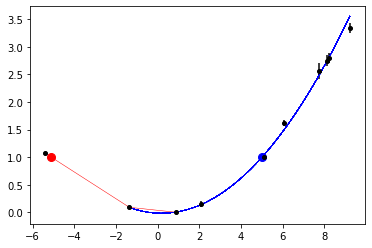

In [18]:
r5 = poly_fit_timescales(x5, y5, ey5, name = "SN2019bkc")

OGLE-13-SN-079 (Inserra et al. 2015). Add OGLE $i$-band discovery epoch.

In [19]:
tb6 = get_ogle13sn079()
ix = np.any([tb6["filter"].values=='r', 
             np.all([tb6["filter"].values=='i', tb6["tmax_rf"].values<3], axis=0)
                    ], axis=0)
tb6 = tb6[ix]

x6 = tb6["tmax_rf"].values
y6 = tb6['mag0_abs'].values
ey6 = tb6['emag'].values

adopt I band t_max estimated by myself


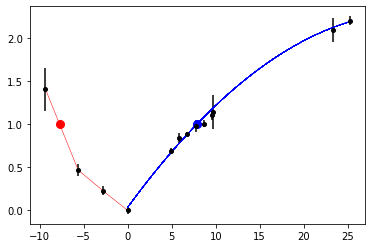

In [20]:
r6 = poly_fit_timescales(x6, y6, ey6, name = 'OGLE13-079')

SN2018kzr (McBrien et al. 2019)

In [21]:
tb7 = get_sn2018kzr()
tb7 = tb7[tb7["filter"].values=="r"]

x7 = tb7["tmax_rf"].values
y7 = tb7['mag0_abs'].values
ey7 = tb7['emag'].values

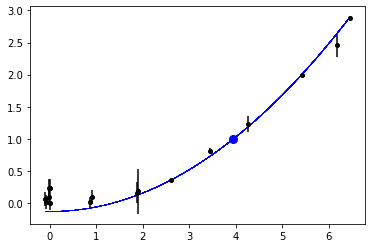

In [22]:
r7 = poly_fit_timescales(x7, y7, ey7, name = 'SN2018kzr')

PTF09dav (Sullivan et al 2011)

In [23]:
tb8 = get_ptf09dav()
x8 = tb8["tmax_rf"].values
y8 = tb8['mag0_abs'].values
ey8 = tb8['emag'].values

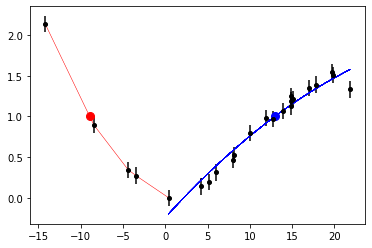

In [24]:
r8 = poly_fit_timescales(x8, y8, ey8, name = 'PTF09dav')

SN2002bj (Poznanski et al. 2010)

In [25]:
tb9 = get_sn2002bj()
ix = tb9["filter"].values == "r"
x9 = tb9["tmax_rf"].values[ix]
y9 = tb9['mag0_abs'].values[ix]
ey9 = tb9['emag'].values[ix]

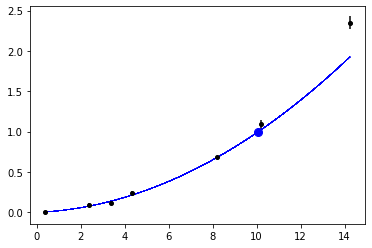

In [26]:
r9 = poly_fit_timescales(x9, y9, ey9, name = 'SN2002bj')

PTF10iuv (Kasliwal et al. 2012)

In [27]:
tb10 = get_ptf10iuv()
ix = tb10["filter"].values=='r'
tb10 = tb10[ix]
x10 = tb10["tmax_rf"].values
y10 = tb10['mag0_abs'].values
ey10 = tb10['emag'].values

adopt g band t_max estimated by myself


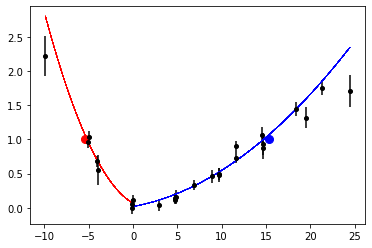

In [28]:
r10 = poly_fit_timescales(x10, y10, ey10, name = 'PTF10iuv')

In [191]:
def adjust_comparefig(ax2, isrise = True):
    if isrise == True:
        ybottom = -15.3
        yupper = -20.7
        xmin = 0
        xmax = 11
    else:
        ybottom = -15.3
        yupper = -18.9
        xmin = 0
        xmax = 21
    ax2.set_ylim(ybottom, yupper)

    ax2.set_xlim(xmin, xmax)
    
    if isrise == False:
        xminor = 1
        xmajor = 5
    else:
        xmajor = 1
        xminor = 0.25
    ax2.xaxis.set_major_locator(plt.MultipleLocator(xmajor))
    ax2.xaxis.set_minor_locator(plt.MultipleLocator(xminor))
    
    if isrise == False:
        yminor = 0.1
        ymajor = 0.5
    else:
        yminor = 0.2
        ymajor = 1
    ax2.yaxis.set_major_locator(plt.MultipleLocator(ymajor))
    ax2.yaxis.set_minor_locator(plt.MultipleLocator(yminor))
    ax2.tick_params(which = 'major', length = 4, top=True, right=True)
    ax2.tick_params(which = 'minor', length = 2, top=True, right=True)
    
    ax2.set_ylabel('Peak magnitude ($r$-band)', fontsize=fs)
    if isrise == True:
        ax2.set_xlabel(r"$t_{\rm rise}$"+" (rest frame days)", fontsize=fs)
    else:
        ax2.set_xlabel(r"$t_{\rm decay}$"+" (rest frame days)", fontsize=fs)
    plt.tight_layout()

In [192]:
def add_timescale_circle(r0, ax, ax2):
    name = r0["name"]
    if name == "AT2019dge":
        z1 = 2
        z2 = 3
        ms = 15
        marker="*"
    else:
        z1 = 1
        z2 = 2
        ms = 6
        marker="o"
        
    color_rise = "k"
    color_decay = "k"
    trise = r0["tau_rise"]
    tdecay = r0["tau_decay"]
    decaylim = r0['tau_decay_lim']
    riselim = r0['tau_rise_lim']
    Mpeak = r0["Mpeak"]
    
    xpos = trise + 0.2
    xpos2 = tdecay + 0.4
    ypos = Mpeak
    ypos2 = Mpeak
    fontsize = fs
    
    if name[:2]=="SN" or name[:2]=="AT":
        tt = name[4:]
    elif name[:4] == "iPTF" or name[:4]=="OGLE":
        tt = name[4:]
    elif name[:3]=="PTF":
        tt = name[3:]
    else:
        tt = name
    if tt=="10X":
        ypos+=0.02
    if tt=="02bj":
        ypos2+=0.02
    if tt=="09dav":
        ypos2-=0.05
    if tt == "19dge":
        fontsize+=2
        xpos2 -=4.2
    if tt=="19bkc":
        ypos2 += 0.1
        xpos2 -= 2
    if tt=="05ek":
        ypos2 -= 0.1
        xpos2 -= 1
    if trise!=-99 and tt!="19bkc":
        if riselim!=True:
            ax.plot(trise, Mpeak, marker=marker, markersize = ms, color = color_rise, zorder = z2)
        else:
            ax.plot(trise, Mpeak, marker=marker, markersize = ms, markerfacecolor = "white", color = color_rise, zorder = z2)
        ax.text(xpos, ypos+0.05, tt, color="k", fontsize = fontsize)
    if tdecay!=-99:
        if decaylim!=True:
            ax2.plot(tdecay, Mpeak, marker=marker, markersize = ms, color = color_decay, zorder = z2)
        else:
            ax2.plot(tdecay, Mpeak, marker=marker, markersize = ms, markerfacecolor = "white", color = color_decay, zorder = z2)
        ax2.text(xpos2, ypos2+0.05, tt, color="k", fontsize = fontsize)

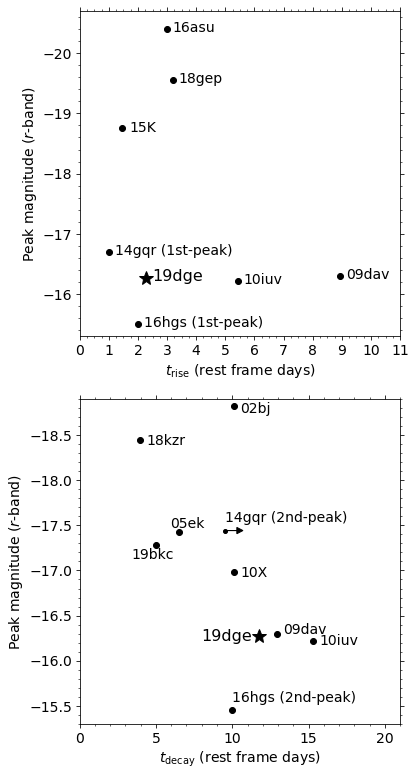

In [193]:
xnum = 6
ynum = 11

fig = plt.figure(figsize=(xnum, ynum))
ax = plt.subplot(211)
ax2 = plt.subplot(212)
add_timescale_circle(r0, ax, ax2)
# add_timescale_circle(r1, ax, ax2)
add_timescale_circle(r2, ax, ax2)
# add_timescale_circle(r3, ax, ax2)
add_timescale_circle(r4, ax, ax2)
add_timescale_circle(r5, ax, ax2)
# add_timescale_circle(r6, ax, ax2)
add_timescale_circle(r7, ax, ax2)
add_timescale_circle(r8, ax, ax2)
add_timescale_circle(r9, ax, ax2)
add_timescale_circle(r10, ax, ax2)

# iPTF14gqr 1st peak
ax.plot(1., -16.7, 'o', ms=6, color= "k")
ax.text(1.2, -16.65, "14gqr (1st-peak)")

# iPTF16hgs 1st peak
ax.plot(2, -15.5, 'o', ms=6, color= "k")
ax.text(2.2, -15.45, "16hgs (1st-peak)")

# add fast-rising SN
ax.plot(3.2, -19.55, 'o', ms=6, color= "k")
ax.text(3.4, -19.5, "18gep")

ax.plot(1.45, -18.75, 'o', ms=6, color= "k")
ax.text(1.7, -18.7, "15K")

ax.plot(3, -20.4, 'o', ms=6, color= "k")
ax.text(3.2, -20.35, "16asu")

# iPTF14gqr, 2nd peak decay
Mpeak = r1["Mpeak"]
ax2.plot(9.5, Mpeak, 'o', ms=4, color= "k")
ax2.arrow(9.5, Mpeak, 0.8, 0, color = 'k', zorder = 6, head_width = 0.07, head_length = 0.4)
ax2.text(9.5, Mpeak-0.1, "14gqr (2nd-peak)")

Mpeak = -15.45
ax2.plot(10, Mpeak, 'o', ms=6, color= "k")
ax2.text(10, Mpeak-0.1, "16hgs (2nd-peak)")

adjust_comparefig(ax, isrise = True)
adjust_comparefig(ax2, isrise = False)
plt.savefig("../paper/figures/compare_mag.pdf")
#plt.close()

### Color Evolution

In [41]:
def adjust_colorfig(ax1, ax2):
    ybottom = -0.7
    yupper = 2.0
    ax1.set_ylim(ybottom, yupper)
    ybottom = -0.7
    yupper = 1.2
    ax2.set_ylim(ybottom, yupper)
    
    xmin = -7
    xmax1 = 34
    xmax2 = 32
    ax1.set_xlim(xmin, xmax1)
    ax2.set_xlim(xmin, xmax2)
    
    ax1.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax1.xaxis.set_minor_locator(plt.MultipleLocator(2))
    ax2.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax2.xaxis.set_minor_locator(plt.MultipleLocator(2))
    ymajor = 0.5
    yminor = 0.1
    ax1.yaxis.set_major_locator(plt.MultipleLocator(ymajor))
    ax1.yaxis.set_minor_locator(plt.MultipleLocator(yminor))
    ax2.yaxis.set_major_locator(plt.MultipleLocator(ymajor))
    ax2.yaxis.set_minor_locator(plt.MultipleLocator(yminor))
    
    ax2.tick_params(which = 'major', length = 4, top=True, right=True)
    ax2.tick_params(which = 'minor', length = 2, top=True, right=True)
    ax1.tick_params(which = 'major', length = 4, top=True, right=True)
    ax1.tick_params(which = 'minor', length = 2, top=True, right=True)
    
    ax1.set_xlabel("Rest-frame time since maximum (d)", fontsize=fs)
    ax2.set_xlabel("Rest-frame time since maximum (d)", fontsize=fs)
    ax1.set_ylabel("$g$/$B-r$/$R$ (mag)", fontsize=fs)
    ax2.set_ylabel("$r$/$R-i$/$I$ (mag)", fontsize=fs)

Transients color evolution

SN2010X: not enough data in multiple filters

In [39]:
tb0 = get_at2019dge(colorplt = True)['ctb']
tb3 = get_ptf10iuv(colorplt = True)
tb2 = get_sn2005ek(colorplt = True)
tb4 = get_iPTF14gqr(colorplt = True) 
tb5 = get_sn2019bkc(colorplt = True) 
tb6 = get_ogle13sn079(colorplt = True)
tb7 = get_sn2002bj(colorplt = True)

adopt g band t_max estimated by myself
adopt r band t_max from Drout+13
adopt I band t_max estimated by myself


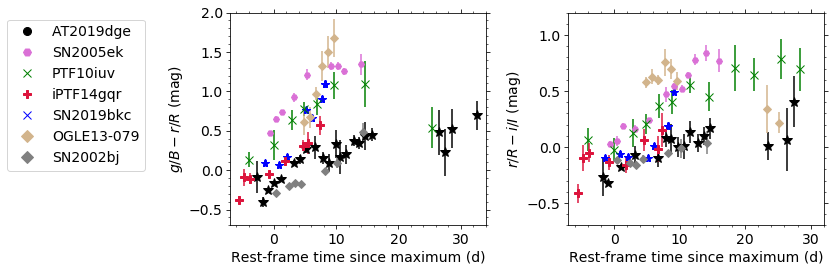

In [45]:
    ms = 8

    xnum = 12
    ynum = 4
    plt.figure(figsize=(xnum, ynum))
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    
    ixg0 = tb0["cname"].values=="gmr"
    ixr0 = tb0["cname"].values=="rmi"
    color = "k"
    ax1.errorbar(tb0["tmax_rf"].values[ixg0], tb0['c'].values[ixg0], tb0['ec'].values[ixg0], fmt='*', color = color, markersize = ms+2)
    ax2.errorbar(tb0["tmax_rf"].values[ixr0], tb0['c'].values[ixr0], tb0['ec'].values[ixr0], fmt='*', color = color, markersize = ms+2)
    ax1.plot(-100,0, 'o', color = color, markersize = ms, label = "AT2019dge")
    
    ixg2 = tb2["cname"].values=="BmR"
    ixr2 = tb2["cname"].values=="RmI"
    color = "orchid"
    ax1.errorbar(tb2["tmax_rf"].values[ixg2], tb2['c'].values[ixg2], tb2['ec'].values[ixg2], fmt='H', color = color, markersize = ms-2)
    ax2.errorbar(tb2["tmax_rf"].values[ixr2], tb2['c'].values[ixr2], tb2['ec'].values[ixr2], fmt='H', color = color, markersize = ms-2)
    ax1.plot(-100,0, 'H', color = color, markersize = ms, label = "SN2005ek")
    
    
    ixg3 = tb3["cname"].values=="gmr"
    ixr3 = tb3["cname"].values=="rmi"
    color = "g"
    off3g = 0
    off3r = 0
    ax1.errorbar(tb3["tmax_rf"].values[ixg3], tb3['c'].values[ixg3]-off3g, tb3['ec'].values[ixg3], fmt='x', color = color, markersize = ms)
    ax2.errorbar(tb3["tmax_rf"].values[ixr3], tb3['c'].values[ixr3]-off3r, tb3['ec'].values[ixr3], fmt='x', color = color, markersize = ms)
    ax1.plot(-100,0, 'x', color = color, markersize = ms, label = "PTF10iuv")
    
    
    ixg4 = tb4["cname"].values=="gmr"
    ixr4 = tb4["cname"].values=="rmi"
    color = "crimson"
    off4g = 0
    off4r = 0
    ax1.errorbar(tb4["tmax_rf"].values[ixg4], tb4['c'].values[ixg4]-off4g, tb4['ec'].values[ixg4], fmt='P', color = color, markersize = ms)
    ax2.errorbar(tb4["tmax_rf"].values[ixr4], tb4['c'].values[ixr4]-off4r, tb4['ec'].values[ixr4], fmt='P', color = color, markersize = ms)
    ax1.plot(-100,0, 'P', color = color, markersize = ms, label = "iPTF14gqr")
    
    ixg5 = tb5["cname"].values=="gmr"
    ixr5 = tb5["cname"].values=="rmi"
    color = "b"
    off5g = 0
    off5r = 0
    ax1.plot(tb5["tmax_rf"].values[ixg5], tb5['c'].values[ixg5]-off5g, '*', color = color, markersize = ms)
    ax2.plot(tb5["tmax_rf"].values[ixr5], tb5['c'].values[ixr5]-off5r, '*', color = color, markersize = ms)
    ax1.plot(-100,0, 'x', color = color, markersize = ms, label = "SN2019bkc")
    
    ixg6 = tb6["cname"].values=="gmr"
    ixr6 = tb6["cname"].values=="rmi"
    color = "tan"
    off6g = 0
    off6r = 0
    ax1.errorbar(tb6["tmax_rf"].values[ixg6], tb6['c'].values[ixg6]-off6g, tb6['ec'].values[ixg6], fmt='D', color = color, markersize = ms-2)
    ax2.errorbar(tb6["tmax_rf"].values[ixr6], tb6['c'].values[ixr6]-off6r, tb6['ec'].values[ixr6], fmt='D', color = color, markersize = ms-2)
    ax1.plot(-100,0, 'D', color = color, markersize = ms, label = "OGLE13-079")
    
    ixg7 = tb7["cname"].values=="BmR"
    ixr7 = tb7["cname"].values=="RmI"
    color = "grey"
    ax1.errorbar(tb7["tmax_rf"].values[ixg7], tb7['c'].values[ixg7], tb7['ec'].values[ixg7], fmt='D', color = color, markersize = ms-2)
    ax2.errorbar(tb7["tmax_rf"].values[ixr7], tb7['c'].values[ixr7], tb7['ec'].values[ixr7], fmt='D', color = color, markersize = ms-2)
    ax1.plot(-100,0, 'D', color = color, markersize = ms, label = "SN2002bj")
    
    adjust_colorfig(ax1, ax2)
    plt.tight_layout(rect = [0.2, 0, 1, 1]) # (left, bottom, right, top)
    ax1.legend(loc='upper left', ncol=1, frameon = True, bbox_to_anchor=(-0.9, 1), fontsize=fs)
    
    plt.savefig("../paper/figures/compare_color.pdf")
    